In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('litres_scraper/books.csv')

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?




In [85]:
df.head()


,name,author,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year
0,Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,https://www.litres.ru/book/vlad-hononov/izucha...,0,NaN,1,319,549,"Эта книга из той лиги, в которой я пока не сос...",0+,2022
1,C++20 для программистов (pdf+epub),"Пол Дейтел, Харви Дейтел",https://www.litres.ru/book/pol-deytel/c-20-dly...,0,NaN,0,1056,699,NaN,16+,2022
2,Разработка сложных отчетов в «1С:Предприятии 8...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/razr...,0,NaN,0,485,490,NaN,12+,2024
3,1С:Предприятие 8.3. Практическое пособие разра...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/1s-p...,"4,5",72,15,983,180,Книга супер!!! Даю проверенный совет. Прошла к...,12+,2023
4,Go. Идиомы и паттерны проектирования (pdf + epub),Джон Боднер,https://www.litres.ru/book/dzhon-bodner/go-idi...,"5,0",7,5,416,699,"Странно, что у этой книги нет отзывов. Да, Go ...",16+,2021


In [86]:
df.shape

(2616, 11)

2. Есть ли в датасете пропуски? (0.5)

In [87]:
df.isnull().sum()

name               0
author           164
link               0
rating             0
rating_count     819
review_count       0
pages_count      118
price             80
text_reviews    1335
age                0
year             198
dtype: int64

3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).

In [88]:
df.dtypes

name            object
author          object
link            object
rating          object
rating_count    object
review_count    object
pages_count     object
price           object
text_reviews    object
age             object
year            object
dtype: object

In [89]:
df['rating'] = df['rating'].str.replace(",", ".", regex=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce',  downcast='integer')
df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce',  downcast='integer')
df['pages_count'] = pd.to_numeric(df['pages_count'], errors='coerce',  downcast='integer')
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [90]:
df.dtypes

name             object
author           object
link             object
rating          float64
rating_count    float64
review_count    float64
pages_count     float64
price           float64
text_reviews     object
age              object
year             object
dtype: object

4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

In [91]:
median_price = df['price'].median()
median_price

np.float64(335.0)

In [92]:
most_common_age = df['age'].mode()[0]
most_common_age

'0+'

In [93]:
average_review_count = df['review_count'].mean()
average_review_count

np.float64(1.758515116724072)

In [94]:
books_below_425 = df[df['rating'] < 4.25].shape[0]
books_below_425

1664

In [95]:
most_common_year = df['year'].mode()[0]
most_common_year

'2023'

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

pass

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

In [97]:
df['is_popular'] = ((df['rating'] >= 4.6) & (df['rating_count'] >= 5)).astype(int)
df[['is_popular']]

,is_popular
0,0
1,0
2,0
3,0
4,1
...,...
2611,0
2612,0
2613,0
2614,0


7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

In [98]:
mean_pages = df.groupby('is_popular')['pages_count'].mean()
mean_pages

is_popular
0    305.422379
1    363.414530
Name: pages_count, dtype: float64

8. Выведите топ-10 книг по числу отзывов. (2).

In [105]:
top_10_books_by_reviews = df.sort_values(by='review_count', ascending=False).head(10)
top_10_books_by_reviews['text_reviews'][478]

'Много интересных путей оптимизации показано. Обьясняется как и зачем вообще она нужна. Много примеров. Подходит не только для средних программистов но и для начинающих.,Даже не знал что эта тема настолько масштабна. Что есть так много инструментов именно по оптимизации и так много направлений.,Сейчас так много все говорят об этой тебе. А она такая обширная и нигде этому не учат. Книга очень помогла начать разбираться что к чему. До этого было очень размытое представление о процессе оптимизации.,Книга не только знакомит с основами оптимизации кода, но и ведет вглубь мира тонких настроек для достижения максимальной производительности.,Можно узнать, как улучшить свой код, избегая лишних операций, оптимизируя циклы и эффективно управляя памятью. Кроме того, автор делится практическими советами по применению кеширования и мемоизации для повышения производительности приложений.,Особое внимание уделено работе с многозадачностью и параллелизмом, где представлены методы использования потоков, 

9. Найдите среднюю длину отзыва (в символах). (2)

In [106]:
df['text_reviews'] = df['text_reviews'].apply(lambda x: x.split('.,') if isinstance(x, str) else [])

In [107]:
df['review_lengths'] = df['text_reviews'].apply(lambda reviews: [len(review.strip()) for review in reviews])
total_review_lengths = df['review_lengths'].explode().dropna()
average_review_length = total_review_lengths.mean()
average_review_length

np.float64(311.69378484410487)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

In [108]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_table = numeric_columns.corr()
correlation_table

,rating,rating_count,review_count,pages_count,price,is_popular
rating,1.000000,0.109523,0.317018,0.380845,0.153887,0.318106
rating_count,0.109523,1.000000,0.689301,-0.043080,0.128553,0.326573
review_count,0.317018,0.689301,1.000000,0.164139,0.157884,0.250186
pages_count,0.380845,-0.043080,0.164139,1.000000,0.386251,0.068031
price,0.153887,0.128553,0.157884,0.386251,1.000000,0.095992
is_popular,0.318106,0.326573,0.250186,0.068031,0.095992,1.000000


- Маленькая кореляция между рейтингом и количеством оценок
- Чем больше оценок, тем больше отзывов

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

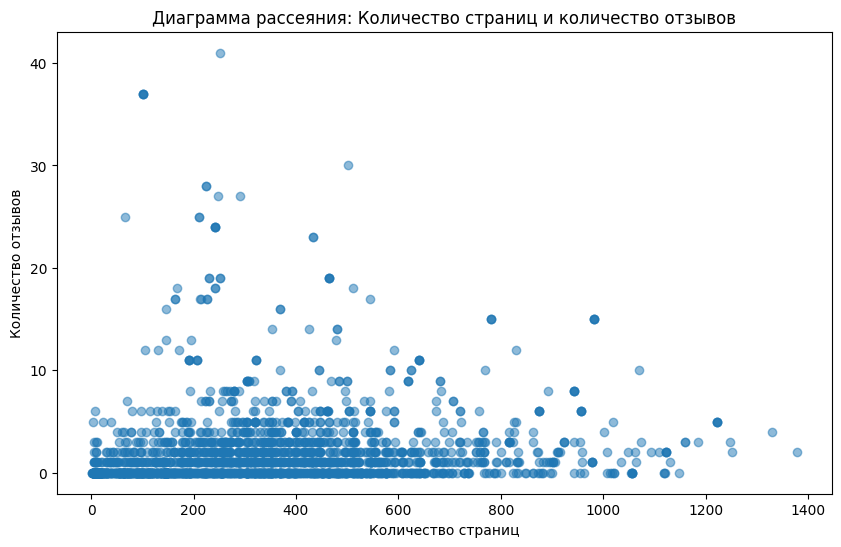

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pages_count'], df['review_count'], alpha=0.5)

plt.title("Диаграмма рассеяния: Количество страниц и количество отзывов")
plt.xlabel("Количество страниц")
plt.ylabel("Количество отзывов")

plt.show()

- Чёткой зависимости нет
- Большинство книг менее 600 страниц

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

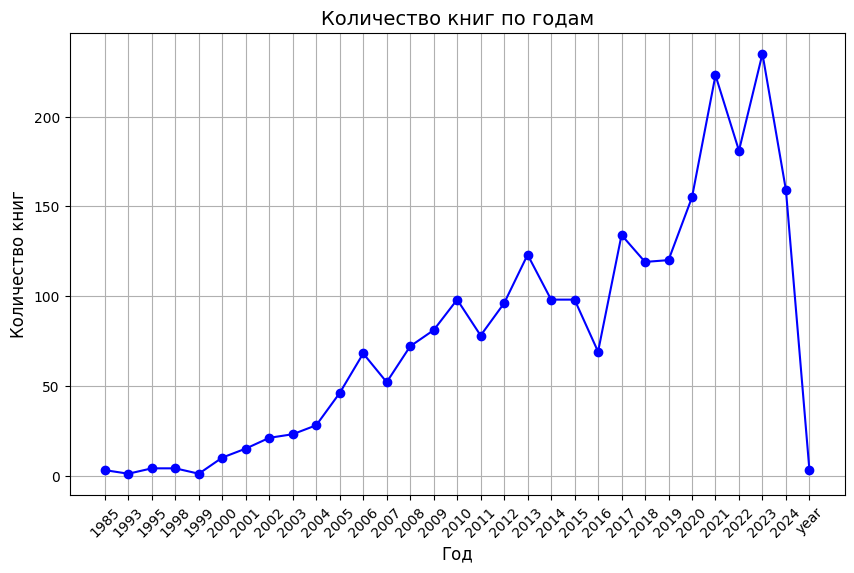

In [113]:
books_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Количество книг по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Количество книг', fontsize=12)
plt.grid(True)
plt.show()

- В 2019 начало выпускаться сильно больше книг
- Росло относительно линейно с неким спадом в 2015-2016
- 2024 ещё не закончился, поэтому о спаде говорить рано

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

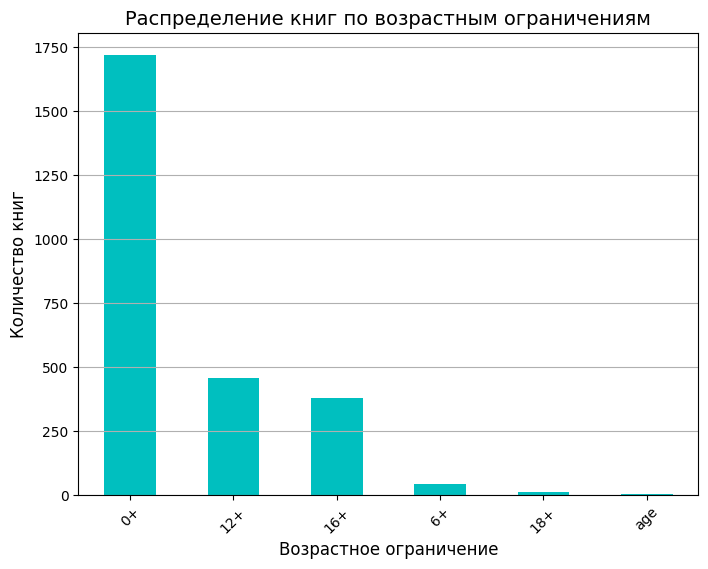

In [114]:
age_distribution = df['age'].value_counts()

plt.figure(figsize=(8, 6))
age_distribution.plot(kind='bar', color='c')
plt.title('Распределение книг по возрастным ограничениям', fontsize=14)
plt.xlabel('Возрастное ограничение', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

- Большинство книг 0+

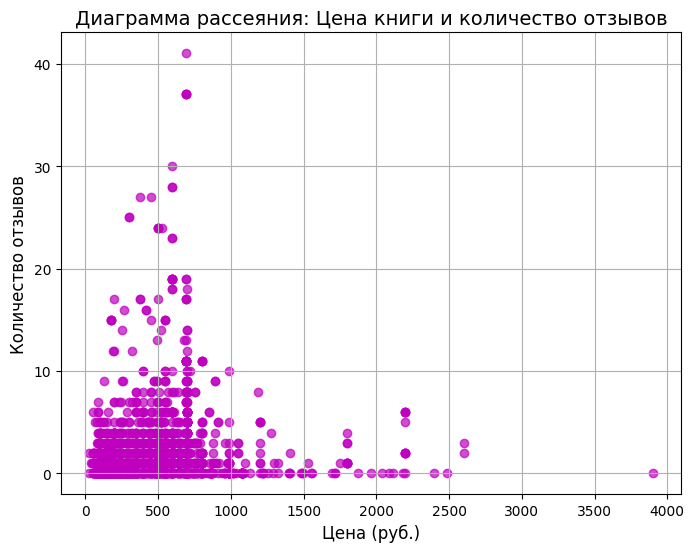

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['review_count'], alpha=0.7, color='m')
plt.title('Диаграмма рассеяния: Цена книги и количество отзывов', fontsize=14)
plt.xlabel('Цена (руб.)', fontsize=12)
plt.ylabel('Количество отзывов', fontsize=12)
plt.grid(True)
plt.show()

- На книги до 1000 рублей почти всегда есть 5-10 отзывов
- На дорогие книги почти нет отзывов

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

In [116]:
author_stats = df.groupby('author').agg(
    num_books=('name', 'count'),
    avg_rating=('rating', 'mean'),
    avg_review_count=('review_count', 'mean')
).reset_index()
author_stats

,author,num_books,avg_rating,avg_review_count
0,Appleinsider.ru,1,0.0,0.0
1,Arsen Gonian,2,5.0,0.5
2,C. И. Никишов,1,4.7,3.0
3,ChatGPT-4,2,3.9,9.0
4,DevZen Podcast,1,5.0,0.0
...,...,...,...,...
1540,Ян Эрик Солем,1,3.3,3.0
1541,"Янта Катупития, Ким Бентли",1,4.9,3.0
1542,"Ярон Мински, Анил Мадхавапедди",1,5.0,2.0
1543,Яцек Галовиц,1,3.8,4.0


14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

- Гипотеза: Дорогие книги име

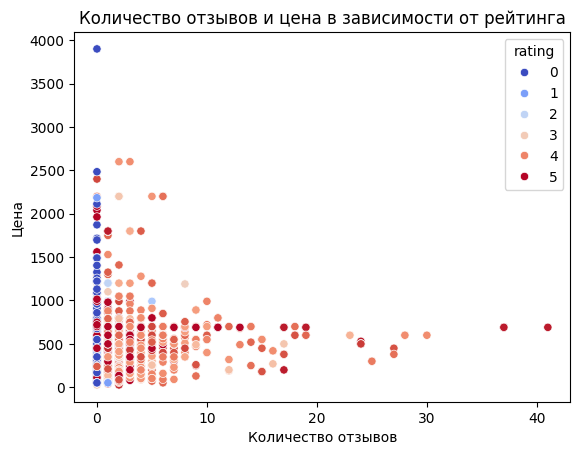

In [120]:
sns.scatterplot(data=df, x='review_count', y='price', hue='rating', palette='coolwarm')
plt.title('Количество отзывов и цена в зависимости от рейтинга')
plt.xlabel('Количество отзывов')
plt.ylabel('Цена')
plt.show()